In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

#### READ DATASET

In [2]:
df=pd.read_csv("capstone_3.csv")
df1=df.copy()
df

,price,km,kw,previous_owners,warranty,nr._of_doors,nr._of_seats,displacement,weight,emission_class,...,color_of_upholstery_Beige,color_of_upholstery_Black,color_of_upholstery_Blue,color_of_upholstery_Brown,color_of_upholstery_Grey,color_of_upholstery_Orange,color_of_upholstery_Other,color_of_upholstery_Red,color_of_upholstery_White,color_of_upholstery_Yellow
0,15770.0,56013.0,66.0,2.0,0.0,5.0,5.0,1422.0,1220.0,6.0,...,0,1,0,0,0,0,0,0,0,0
1,14500.0,80000.0,141.0,1.0,0.0,3.0,4.0,1798.0,1255.0,6.0,...,0,0,0,0,1,0,0,0,0,0
2,14640.0,83450.0,85.0,1.0,0.0,4.0,4.0,1598.0,1135.0,6.0,...,0,1,0,0,0,0,0,0,0,0
3,14500.0,73000.0,66.0,1.0,0.0,3.0,4.0,1422.0,1195.0,6.0,...,0,1,0,0,0,0,0,0,0,0
4,16790.0,16200.0,66.0,1.0,0.0,5.0,5.0,1422.0,1135.0,6.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14420,39980.0,100.0,118.0,1.0,0.0,5.0,7.0,1598.0,1734.0,6.0,...,0,0,0,0,1,0,0,0,0,0
14421,39950.0,0.0,147.0,1.0,24.0,5.0,5.0,1997.0,1758.0,6.0,...,0,0,0,1,0,0,0,0,0,0
14422,39950.0,0.0,147.0,1.0,24.0,5.0,5.0,1997.0,1758.0,6.0,...,0,1,0,0,0,0,0,0,0,0
14423,39875.0,15.0,146.0,1.0,0.0,5.0,7.0,1997.0,1734.0,6.0,...,0,1,0,0,0,0,0,0,0,0


##### DATA PREPARATION

In [3]:
df.shape

(14425, 113)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14425 entries, 0 to 14424
Columns: 113 entries, price to color_of_upholstery_Yellow
dtypes: float64(44), int64(69)
memory usage: 12.4 MB


In [5]:
df.describe()

,price,km,kw,previous_owners,warranty,nr._of_doors,nr._of_seats,displacement,weight,emission_class,...,color_of_upholstery_Beige,color_of_upholstery_Black,color_of_upholstery_Blue,color_of_upholstery_Brown,color_of_upholstery_Grey,color_of_upholstery_Orange,color_of_upholstery_Other,color_of_upholstery_Red,color_of_upholstery_White,color_of_upholstery_Yellow
count,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,...,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000,14425.000000
mean,17790.118406,27386.796811,85.679653,1.042010,6.841179,4.649497,4.935251,1403.159307,1322.068977,5.995217,...,0.003120,0.836256,0.000901,0.016568,0.079653,0.000069,0.061629,0.000624,0.000901,0.000277
std,6721.731701,29059.596920,22.677180,0.255084,13.569773,0.657409,0.465201,269.457520,184.443767,0.070980,...,0.055768,0.370055,0.030008,0.127652,0.270765,0.008326,0.240489,0.024971,0.030008,0.016650
min,13.000000,0.000000,40.000000,0.000000,0.000000,1.000000,2.000000,890.000000,840.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12920.000000,1459.000000,66.000000,1.000000,0.000000,4.000000,5.000000,1200.000000,1163.000000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16940.000000,19525.000000,85.000000,1.000000,0.000000,5.000000,5.000000,1422.000000,1278.000000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21800.000000,41500.000000,100.000000,1.000000,12.000000,5.000000,5.000000,1598.000000,1425.000000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,68320.000000,114912.000000,150.000000,4.000000,72.000000,7.000000,7.000000,2000.000000,1905.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.head()

,price,km,kw,previous_owners,warranty,nr._of_doors,nr._of_seats,displacement,weight,emission_class,...,color_of_upholstery_Beige,color_of_upholstery_Black,color_of_upholstery_Blue,color_of_upholstery_Brown,color_of_upholstery_Grey,color_of_upholstery_Orange,color_of_upholstery_Other,color_of_upholstery_Red,color_of_upholstery_White,color_of_upholstery_Yellow
0,15770.0,56013.0,66.0,2.0,0.0,5.0,5.0,1422.0,1220.0,6.0,...,0,1,0,0,0,0,0,0,0,0
1,14500.0,80000.0,141.0,1.0,0.0,3.0,4.0,1798.0,1255.0,6.0,...,0,0,0,0,1,0,0,0,0,0
2,14640.0,83450.0,85.0,1.0,0.0,4.0,4.0,1598.0,1135.0,6.0,...,0,1,0,0,0,0,0,0,0,0
3,14500.0,73000.0,66.0,1.0,0.0,3.0,4.0,1422.0,1195.0,6.0,...,0,1,0,0,0,0,0,0,0,0
4,16790.0,16200.0,66.0,1.0,0.0,5.0,5.0,1422.0,1135.0,6.0,...,0,1,0,0,0,0,0,0,0,0


##### DISTRIBUTION OF FEATURES

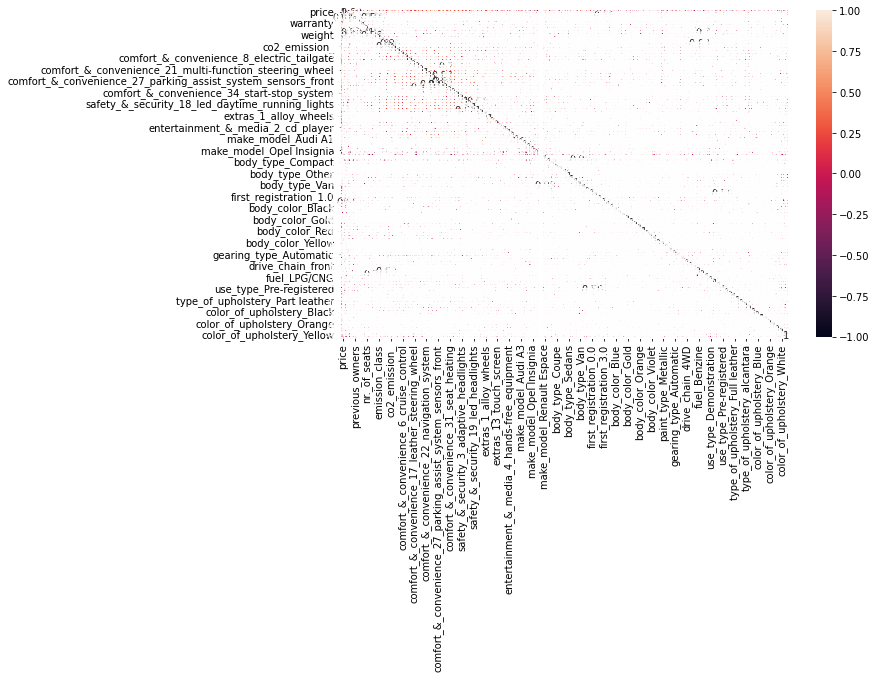

In [8]:
sns.heatmap(df.corr(), annot = True);

In [9]:
import missingno as msno

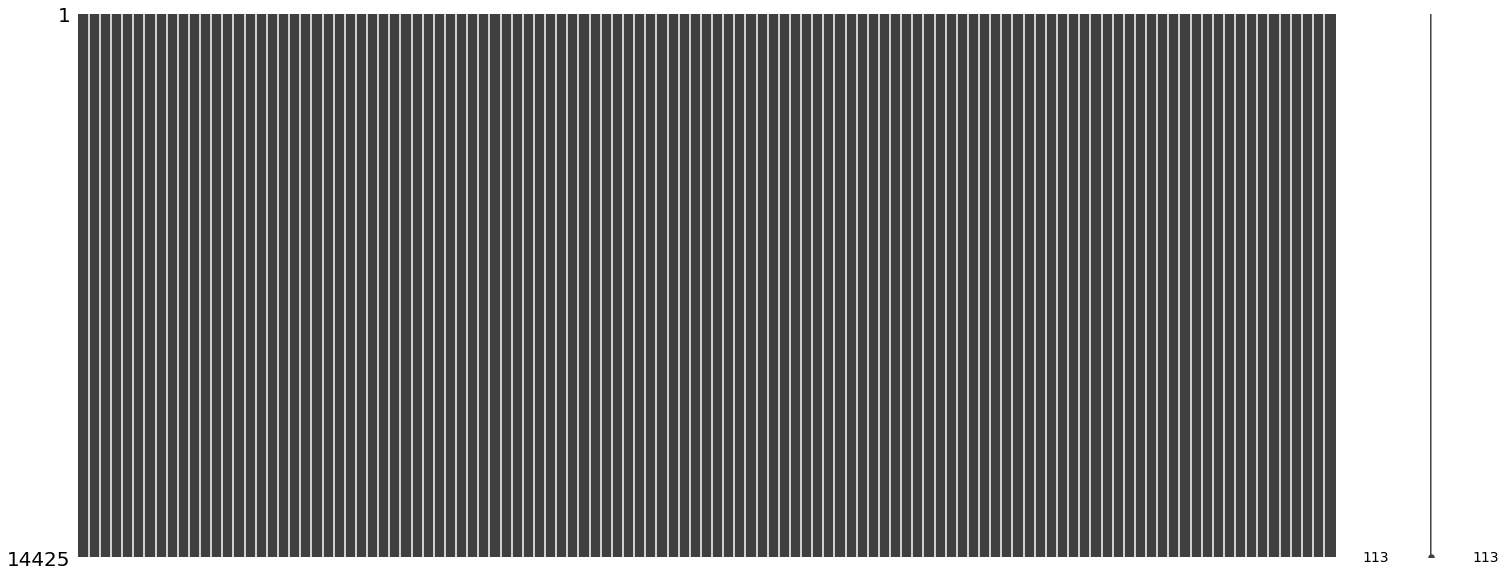

In [13]:
msno.matrix(df.iloc[:,:]);

##### TRAIN - TEST SPLIT

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
y=df.price
X=df.drop(["price"],axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [18]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11540, 112)
Train target shape   :  (11540,)
Test features shape  :  (2885, 112)
Test target shape    :  (2885,)


In [19]:
X_train

,km,kw,previous_owners,warranty,nr._of_doors,nr._of_seats,displacement,weight,emission_class,gears,...,color_of_upholstery_Beige,color_of_upholstery_Black,color_of_upholstery_Blue,color_of_upholstery_Brown,color_of_upholstery_Grey,color_of_upholstery_Orange,color_of_upholstery_Other,color_of_upholstery_Red,color_of_upholstery_White,color_of_upholstery_Yellow
92,26064.0,85.0,1.0,12.0,5.0,4.0,1598.0,1275.0,6.0,7.0,...,0,1,0,0,0,0,0,0,0,0
14188,1.0,118.0,1.0,0.0,5.0,7.0,1598.0,1734.0,6.0,6.0,...,0,0,0,1,0,0,0,0,0,0
7369,5100.0,110.0,1.0,60.0,5.0,5.0,1399.0,1425.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,0
8454,32301.0,66.0,1.0,0.0,5.0,5.0,1398.0,1163.0,6.0,5.0,...,0,1,0,0,0,0,0,0,0,0
10586,26970.0,121.0,1.0,0.0,4.0,5.0,1490.0,1487.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,10.0,110.0,1.0,0.0,5.0,5.0,1498.0,1325.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,0
13418,15.0,56.0,1.0,0.0,5.0,5.0,898.0,1100.0,6.0,5.0,...,0,0,0,0,0,0,1,0,0,0
5390,5.0,110.0,1.0,36.0,5.0,5.0,1498.0,1325.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,0
860,48200.0,70.0,1.0,12.0,3.0,4.0,999.0,1110.0,6.0,5.0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
X_test

,km,kw,previous_owners,warranty,nr._of_doors,nr._of_seats,displacement,weight,emission_class,gears,...,color_of_upholstery_Beige,color_of_upholstery_Black,color_of_upholstery_Blue,color_of_upholstery_Brown,color_of_upholstery_Grey,color_of_upholstery_Orange,color_of_upholstery_Other,color_of_upholstery_Red,color_of_upholstery_White,color_of_upholstery_Yellow
8361,59613.0,52.0,1.0,0.0,5.0,5.0,1229.0,1163.0,6.0,5.0,...,0,1,0,0,0,0,0,0,0,0
2807,39999.0,81.0,1.0,0.0,5.0,5.0,1598.0,1355.0,6.0,7.0,...,0,1,0,0,0,0,0,0,0,0
6290,19000.0,81.0,1.0,12.0,5.0,5.0,1598.0,1350.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,0
14210,21377.0,119.0,1.0,12.0,5.0,5.0,1598.0,1734.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,0
3014,53411.0,81.0,1.0,0.0,5.0,5.0,1598.0,1260.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,67600.0,85.0,2.0,0.0,4.0,5.0,1598.0,1425.0,6.0,5.0,...,0,1,0,0,0,0,0,0,0,0
10419,31500.0,100.0,1.0,0.0,5.0,5.0,1598.0,1623.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,0
14006,68570.0,118.0,1.0,12.0,5.0,5.0,1598.0,1659.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,0
1434,8279.0,92.0,1.0,0.0,5.0,4.0,1395.0,1215.0,6.0,7.0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
y_train

92       18900.0
14188    32900.0
7369     20980.0
8454      7949.0
10586    21550.0
          ...   
5191     24688.0
13418    10389.0
5390     25410.0
860      14950.0
7270     28500.0
Name: price, Length: 11540, dtype: float64

In [22]:
y_test

8361      7879.0
2807     16490.0
6290     11600.0
14210    31980.0
3014     14890.0
          ...   
5766     10580.0
10419    10000.0
14006    20455.0
1434     21900.0
14407    47950.0
Name: price, Length: 2885, dtype: float64

### Model Fitting and Compare Actual and Predicted Labels

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)
y_pred

array([ 7689.34650925, 18867.90292518, 12549.07802008, ...,
       24271.98956085, 21189.2269215 , 39478.62211264])

In [29]:
model.coef_

array([-4.63022335e-02,  7.23080922e+01, -4.80929888e+01,  2.12489458e+00,
        3.33303883e+02, -3.41762974e+01,  3.97694327e-01, -1.20827090e+00,
       -1.07440471e+02,  3.03522344e+02,  2.78599197e+04, -2.32378724e+01,
       -2.26612899e+02,  2.88179172e+02,  2.07535375e+02,  2.19249802e+02,
        3.73535584e+02,  3.02685130e+02,  3.20681175e+01,  3.56427047e+01,
        3.97111882e+02,  4.70383112e+02,  3.06439085e+02,  2.88276286e+02,
       -4.63214470e+02, -2.63331124e+02,  1.62077979e+02, -1.03465064e+02,
        4.12904292e+02,  7.32410670e+01,  1.35556011e+02, -2.80655919e+02,
        1.00032421e+03,  4.71654512e+02, -2.02295550e+02,  1.54080604e+02,
        1.10495592e+02,  1.78154773e+02, -4.21985299e+02, -9.99757050e+01,
        7.80380194e+02, -3.01098148e+02, -4.80788112e+01,  1.53103897e+03,
        3.03881132e+03, -2.03202831e+03, -4.05144056e+03,  1.17931293e+03,
       -4.31578410e+03, -2.49656296e-10,  4.65008976e+03, -1.32810066e+02,
       -3.47633279e+02, -

In [30]:
model.intercept_

13536.774021367233

In [31]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

21616.143402561993

In [32]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [33]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual,LSE,ABS
8361,7879.0,7689.346509,189.653491,3.596845e+04,189.653491
2807,16490.0,18867.902925,-2377.902925,5.654422e+06,2377.902925
6290,11600.0,12549.078020,-949.078020,9.007491e+05,949.078020
14210,31980.0,29133.326912,2846.673088,8.103548e+06,2846.673088
3014,14890.0,16374.579407,-1484.579407,2.203976e+06,1484.579407
...,...,...,...,...,...
5766,10580.0,9371.033689,1208.966311,1.461600e+06,1208.966311
10419,10000.0,17242.600087,-7242.600087,5.245526e+07,7242.600087
14006,20455.0,24271.989561,-3816.989561,1.456941e+07,3816.989561
1434,21900.0,21189.226921,710.773079,5.051984e+05,710.773079


In [34]:
result_sample = comparing.iloc[:, :3]
result_sample

,Actual,Pred,Residual
8361,7879.0,7689.346509,189.653491
2807,16490.0,18867.902925,-2377.902925
6290,11600.0,12549.078020,-949.078020
14210,31980.0,29133.326912,2846.673088
3014,14890.0,16374.579407,-1484.579407
...,...,...,...
5766,10580.0,9371.033689,1208.966311
10419,10000.0,17242.600087,-7242.600087
14006,20455.0,24271.989561,-3816.989561
1434,21900.0,21189.226921,710.773079


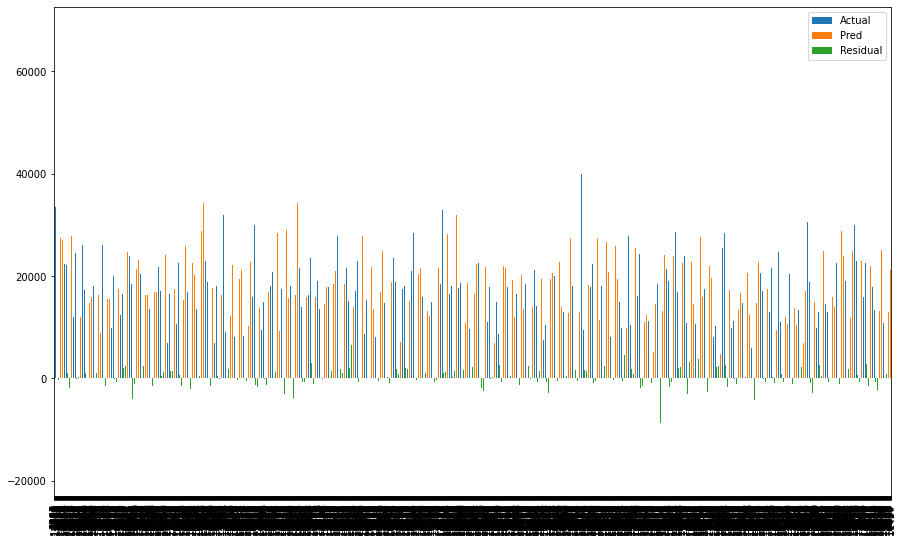

In [35]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

#### ERROR METRICS

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8805595712210889

In [38]:
mae = mean_absolute_error(y_test, y_pred) #comparing.ABS.sum()/X_test.shape[0]
mae

1608.35054189168

In [39]:
mse = mean_squared_error(y_test, y_pred) # comparing.LSE.sum()/X_test.shape[0]
mse

5518575.1290458925

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #(comparing.LSE.sum()/X_test.shape[0])**0.5
rmse

2349.1647726470555

In [43]:
mae/df.price.mean()

0.09040696105711638

In [45]:
rmse/df.price.mean()

0.13204885538674785

#### Adjusted R2 score 



In [46]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations (rows)
    p = X.shape[1] # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [47]:
df.shape

(14425, 113)

In [48]:
adj_r2(y_test, y_pred, df)

0.8796248780948146

#### What is the concept of punishment for RMSE error metric?

#### Evaluation Model

In [49]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

In [50]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score : 0.8805595712210889
MAE      : 1608.35054189168
MSE      : 5518575.1290458925
RMSE     : 2349.1647726470555


In [51]:
y_train_pred = model.predict(X_train)

In [52]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score : 0.8805595712210889
MAE      : 1608.35054189168
MSE      : 5518575.1290458925
RMSE     : 2349.1647726470555


#### Plotting residuals

In [53]:
residuals = y_test-y_pred

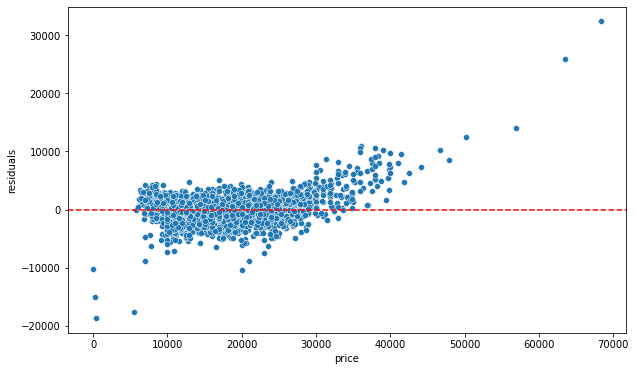

In [54]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

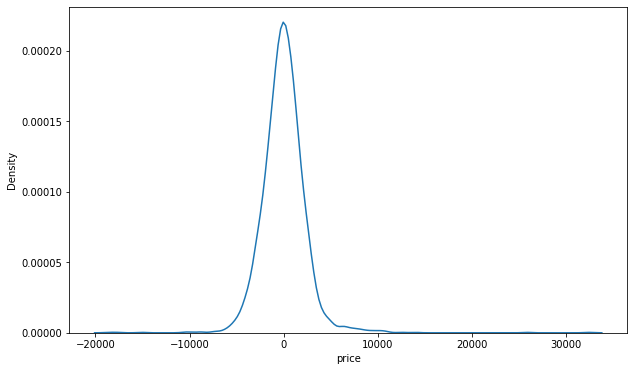

In [55]:
sns.kdeplot(residuals);

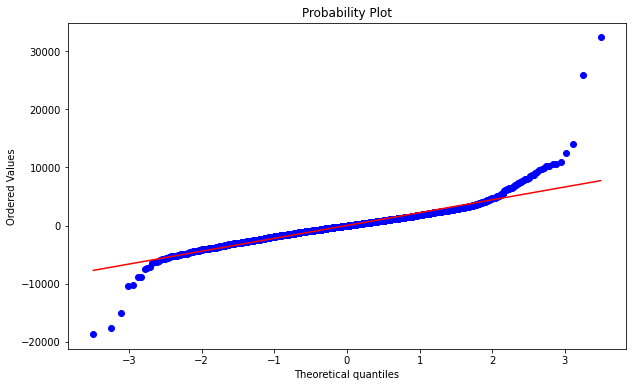

In [56]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [57]:
from scipy.stats import skew
skew(residuals)

1.3822095078765744

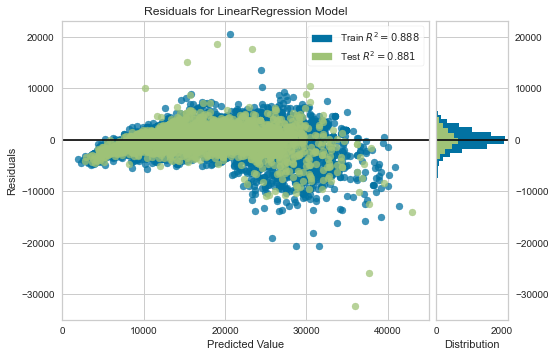

In [58]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

#### Prediction Error for LinearRegression

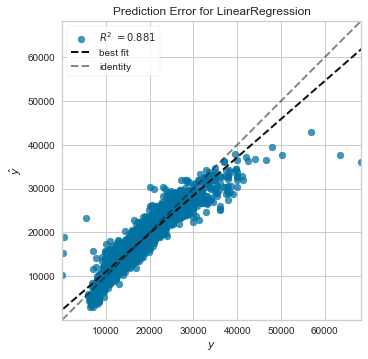

In [59]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

#### Retraining Model on Full Data

In [60]:
final_model = LinearRegression()

In [61]:
final_model.fit(X, y)

LinearRegression()

#### Coefficients

In [62]:
final_model.coef_

array([-4.53671612e-02,  7.11345354e+01, -6.11999991e+01,  2.66883894e+00,
        3.28871929e+02, -4.39525623e+01,  4.55787328e-01, -1.08440156e+00,
       -1.43607881e+02,  3.10941847e+02,  3.74645231e+04, -2.64233917e+01,
       -2.28895382e+02,  2.91512607e+02,  1.91767171e+02,  2.37000275e+02,
        3.22285290e+02,  2.63559182e+02,  4.33484292e+01,  3.22412488e+01,
        4.09973488e+02,  4.92523764e+02,  3.30767483e+02,  3.06752967e+02,
       -4.65616350e+02, -2.25442287e+02,  1.23408797e+02, -7.08134996e+01,
        3.37205676e+02,  5.95127415e+01,  1.13056238e+02, -2.56853914e+02,
        9.48761665e+02,  5.08290819e+02, -1.72653944e+02,  1.91134206e+02,
        7.44695221e+01,  2.16264944e+02, -4.16479282e+02, -9.20537022e+01,
        8.33733102e+02, -2.78486082e+02, -1.02568713e+02,  1.58794708e+03,
        3.06222637e+03, -1.98756779e+03, -4.07148273e+03,  1.15575400e+03,
       -4.23283021e+03, -7.32143235e-11,  4.48595327e+03, -1.85340695e+02,
        4.61195635e+02, -

In [63]:
final_model.intercept_

12751.255988094277

In [64]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [65]:
coeff_df

,Coefficient
km,-0.045367
kw,71.134535
previous_owners,-61.199999
warranty,2.668839
nr._of_doors,328.871929
...,...
color_of_upholstery_Orange,1160.672187
color_of_upholstery_Other,-97.307831
color_of_upholstery_Red,-138.394836
color_of_upholstery_White,569.916199


#### Prediction on New Data